# Working with mnist dataset 
[https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv](https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
test = pd.read_csv('mnist_test.csv')

In [3]:
train = pd.read_csv('mnist_train.csv')

In [4]:
train.shape

(60000, 785)

In [6]:
test.shape

(10000, 785)

In [7]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.columns[:50]

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       '1x10', '1x11', '1x12', '1x13', '1x14', '1x15', '1x16', '1x17', '1x18',
       '1x19', '1x20', '1x21', '1x22', '1x23', '1x24', '1x25', '1x26', '1x27',
       '1x28', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9',
       '2x10', '2x11', '2x12', '2x13', '2x14', '2x15', '2x16', '2x17', '2x18',
       '2x19', '2x20', '2x21'],
      dtype='object')

In [24]:
Xtrain = train.iloc[:,1:]
Ytrain = train.iloc[:,:1]
Xtest = test.iloc[:,1:]
Ytest = test.iloc[:,:1]

## Trying to visualise one image

In [10]:
Xtrain.iloc[0].values.shape

(784,)

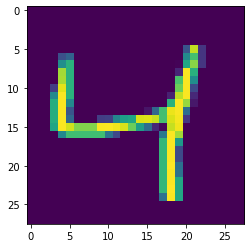

In [11]:
plt.imshow(Xtrain.iloc[2].values.reshape(28,28));

# Creating reusable draw image function

In [12]:
# X,Y is dataframe 
def drawImg(X,Y,idx):
    plt.imshow(X.iloc[idx].values.reshape(28,28),cmap='gray') #we have to convert 1D(784,1) to 2D (28,28)
    plt.title(f'Label {Y.iloc[idx,0]}')
    plt.axis('off')
    plt.show()

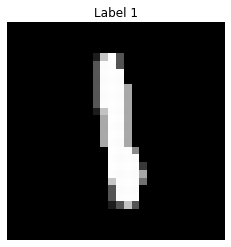

In [13]:
drawImg(Xtrain,Ytrain,200)

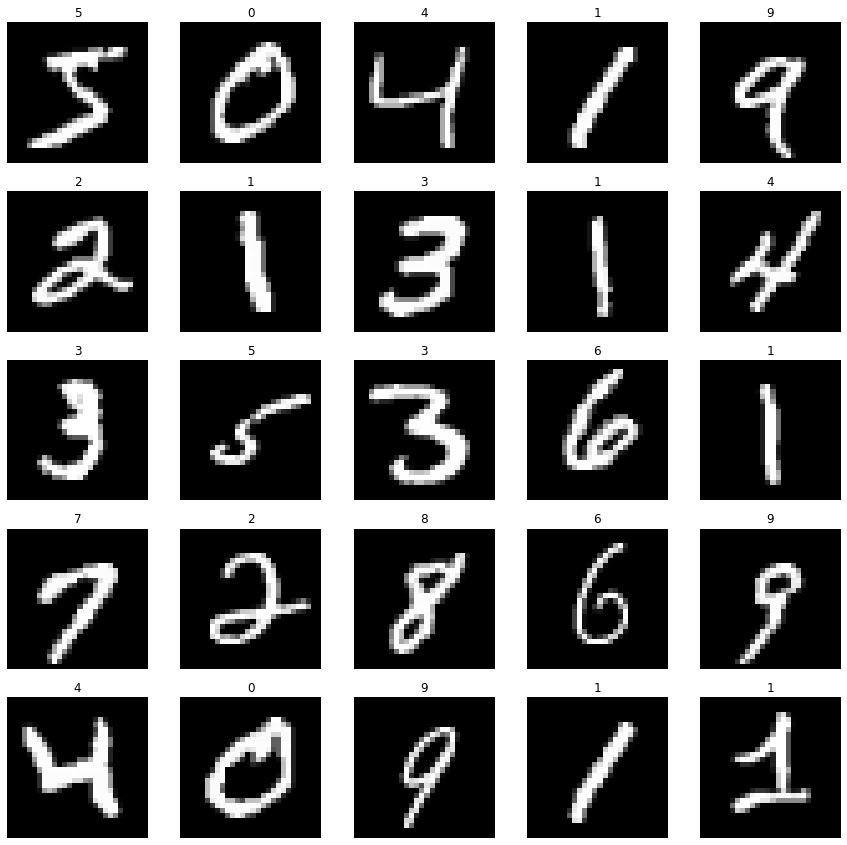

In [25]:
#Trying to visualise for first 25 images 5 x 5

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1) #creating subplot of (rows=5,col=5,index)
    plt.imshow(Xtrain.iloc[i].values.reshape(28,28),cmap='gray')
    plt.title(f'{Ytrain.iloc[i,0]}')
    plt.axis('off')

# Recognising Hand Written Digits on MNIST using KNN(K Nearest Neighbour)

In [211]:
# every argument is of type pandas Dataframe

def get_label(Xtrain, Ytrain, Xtest,row,col,plot_idx):
    # converting every thing to numpy
    Xtrain = Xtrain.values
    Ytrain = Ytrain.values
    Xtest  = Xtest.values
    diff = Xtrain - Xtest.reshape(1,-1)
    diff **= 2
    res = np.array(np.sqrt(diff.sum(axis = 1)))
    #since i dont know how to merge ndarray column wise in numpy and sort it therefore i have changed ndarray to DataFrame 
    df = pd.DataFrame(res)
    df['1'] = Ytrain 
    df.columns = ['difference','label']
    df = df.sort_values('difference')
    plt.subplot(row,col,plot_idx)
    plt.imshow(Xtest.reshape(28,-1),cmap='gray')
    plt.axis('off')
    plt.title(f'Guess {df.iloc[0,1]}')   


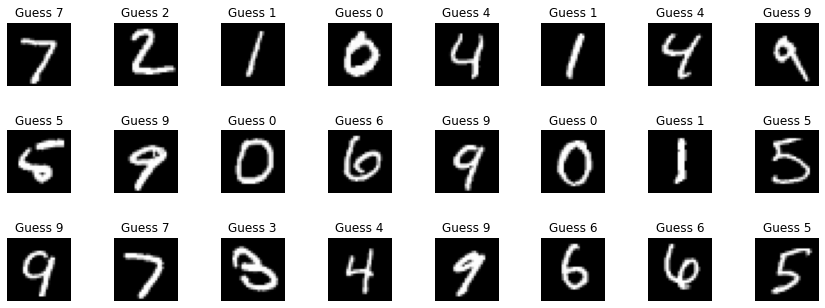

In [221]:
plt.figure(figsize=(15,15))
# set the spacing between subplots
plt.subplots_adjust(hspace=0.7)

for i in range(24):
    get_label(Xtrain,Ytrain,Xtest.iloc[i],8,8,i+1) 

### Mission accomplished  :D